In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn
from sklearn.model_selection import train_test_split
import mglearn


data_dir = "../Dataset"


def get_data(data_dir: str) -> pd.DataFrame:
    data = pd.DataFrame()
    data['Trafico'] = 2
#     data['Weekend'] = 2 
    for path in os.listdir(data_dir):    #para cada archivo de la carpeta        
        dir_content = os.path.join(data_dir, path)   #unir cada nombre del archivo al directorio
        if os.path.isfile(dir_content):   #compruebo si es archivo (nombre de ruta absoluto)
            directory = pd.read_csv(dir_content)
            if path == "Normal_data.csv":
                directory['Trafico']= 0
            else:
                directory['Trafico']= 1
#             datetime = pd.to_datetime(directory['Timestamp'], dayfirst = True)
#             dias = datetime.dt.weekday
            
        data = pd.concat([data, directory])      
#     for i, day in enumerate(dias): 
#         if day == 6:
#             data['Weekend'] = data['Weekend'].replace(NaN,1)
#         else:
#             data['Weekend'] = data['Weekend'].replace(NaN,0)

#     print(data['Weekend'][83])
#     print(data['Timestamp'][83])
     
            
    return data


dataset = get_data(data_dir)

#dataset.to_csv('dataset.csv')

dataset['Src-192.168.3.'] = np.where(dataset['Src IP'].str.startswith('192.168.3.'), 1,0)
dataset['Src-192.168.20.'] = np.where(dataset['Src IP'].str.startswith('192.168.20.'), 1,0)
dataset['Src-192.168.8.'] = np.where(dataset['Src IP'].str.startswith('192.168.8.'), 1,0)
dataset['Src-172.17.0.'] = np.where(dataset['Src IP'].str.startswith('172.17.0.'), 1,0)
dataset['Src-200.175.2.0'] = np.where(dataset['Src IP'].str.startswith('200.175.2.0.'), 1,0)

dataset = pd.get_dummies(dataset, prefix={'Protocol': 'Protocol', 'Label': 'Label'}, columns=['Protocol', 'Label'],drop_first=True)

datetime = pd.to_datetime(dataset['Timestamp'], dayfirst = True)
horas = datetime.dt.hour
dataset['hora_sin'] = np.sin(horas*(2.*np.pi/24))
dataset['hora_cos'] = np.cos(horas*(2.*np.pi/24))

dataset

,Trafico,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Label_BOTNET,Label_DDoS,Label_DDoS,Label_DoS,Label_Normal,Label_Probe,Label_U2R,Label_Web-Attack,hora_sin,hora_cos
0,1,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694.0,200.175.2.130,4444.0,10/1/2020 5:02,269709.0,4.0,5.0,...,0,0,0,0,0,0,1,0,0.965926,0.258819
1,1,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693.0,200.175.2.130,4444.0,10/1/2020 5:02,268599.0,2.0,3.0,...,0,0,0,0,0,0,1,0,0.965926,0.258819
2,1,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747.0,192.168.3.130,3632.0,10/1/2020 5:02,22194.0,5.0,5.0,...,0,0,0,0,0,0,1,0,0.965926,0.258819
3,1,192.168.3.130-200.175.2.130-8180-38745-6,200.175.2.130,38745.0,192.168.3.130,8180.0,10/1/2020 1:39,9556.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0.258819,0.965926
4,1,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217.0,192.168.3.130,8180.0,10/1/2020 1:39,8782.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0.258819,0.965926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138717,1,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440.0,172.17.0.2,80.0,25/12/2019 05:19:55 PM,296.0,1.0,1.0,...,0,0,0,0,0,0,0,1,-0.965926,-0.258819
138718,1,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446.0,172.17.0.2,80.0,25/12/2019 05:20:00 PM,3431.0,2.0,5.0,...,0,0,0,0,0,0,0,1,-0.965926,-0.258819
138719,1,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446.0,172.17.0.2,80.0,25/12/2019 05:20:00 PM,4121.0,1.0,1.0,...,0,0,0,0,0,0,0,1,-0.965926,-0.258819
138720,1,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456.0,172.17.0.2,80.0,25/12/2019 05:20:05 PM,5887.0,2.0,5.0,...,0,0,0,0,0,0,0,1,-0.965926,-0.258819


In [6]:
dataset = dataset.drop(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp'], axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler

dataset


scaler = StandardScaler()
scaler.fit(dataset)
X_scaled = scaler.transform(dataset)


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (343889, 96)
Reduced shape: (343889, 2)


Text(0, 0.5, 'Second principal component')

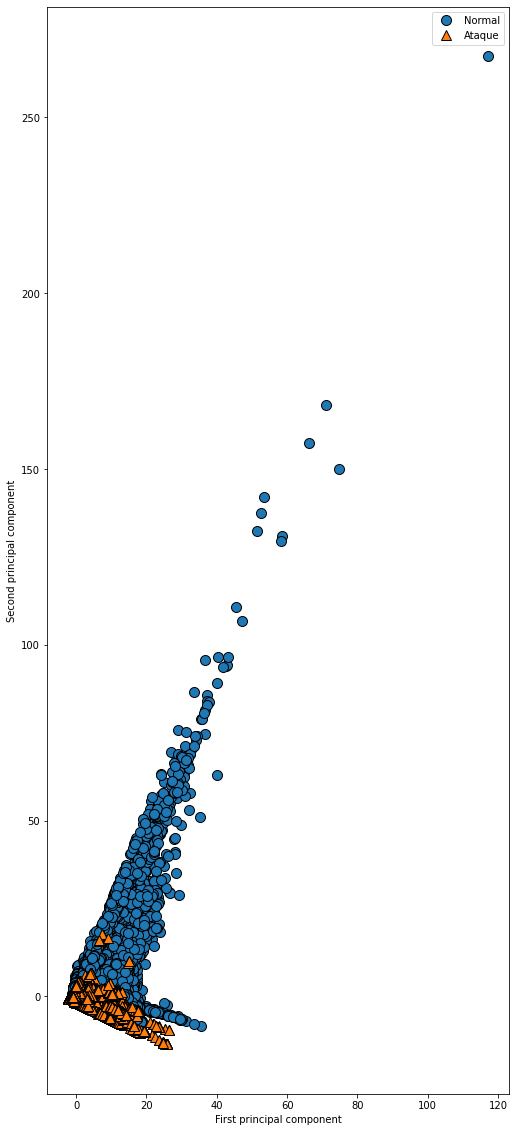

In [9]:
plt.figure(figsize=(20,20))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], dataset['Trafico'])
plt.legend(['Normal', 'Ataque'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [10]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 96)


In [11]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[-7.19135414e-02  2.29732638e-02  1.16695762e-01  2.49578790e-01
   2.48989768e-03  5.53268618e-02  1.83070367e-02  4.93028963e-02
   8.15306246e-02  4.60669147e-04  5.61585859e-02  6.36003500e-02
   8.96738509e-02 -2.40690961e-03  8.65299902e-02  9.21437937e-02
   1.92998844e-02 -7.24105452e-02  2.17132547e-01  2.37732712e-01
   2.47117978e-01  2.03584201e-02  1.53002738e-01  1.30352069e-01
   1.41942651e-01  1.56049194e-01  2.34165349e-02  2.49316231e-01
   2.26764559e-01  2.35658347e-01  2.45399610e-01  2.84239443e-02
  -0.00000000e+00  5.42438069e-02 -0.00000000e+00 -2.82490283e-03
   5.87075570e-02  5.76741584e-02 -3.72592993e-03 -7.24610772e-02
  -6.43403628e-03  9.85330349e-02  1.00587550e-01  1.03436887e-01
   5.74109944e-02  1.11935548e-01  1.17676318e-02 -2.79308470e-03
   5.42438069e-02  1.27748992e-01 -2.82490283e-03 -0.00000000e+00
  -0.00000000e+00  8.97354762e-02  9.83136274e-02  5.61585859e-02
   8.65299902e-02 -0.00000000e+00 -0.00000000e+00 -0.0000000

In [12]:
dataset.columns.values

array(['Trafico', 'Src Port', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s',
       'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count',
       'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
 

Text(0, 0.5, 'Principal components')

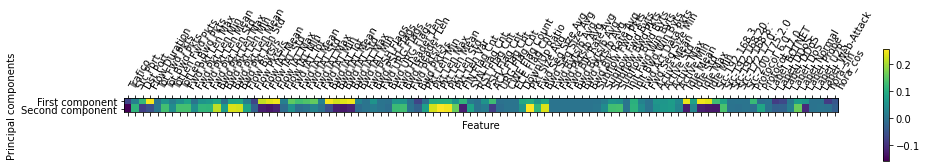

In [13]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0,1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(dataset.columns.values)), dataset.columns.values, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [27]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100, contamination= 0.03, max_samples='auto')
prediction= iforest.fit_predict(dataset)

print(prediction[:20])
print("Number of outliers detected: {}".format(prediction[prediction < 0].sum()))
print("Number of normal samples detected: {}".format(prediction[prediction > 0].sum()))

C:\Users\Lucho\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of outliers detected: -10317
Number of normal samples detected: 333572


[1 1 1 ... 1 1 1]


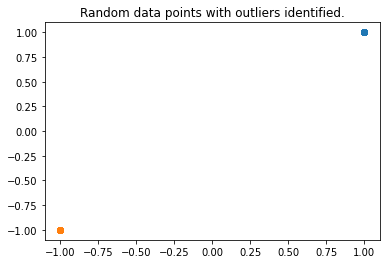

In [35]:
normal_data = prediction[prediction > 0]
outliers = prediction[prediction < 0]
print(normal_data)
plt.scatter(normal_data[:], normal_data[:])
plt.scatter(outliers[:], outliers[:])
plt.title("Random data points with outliers identified.")
plt.show()


Index(['Trafico', 'Src Port', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       '